In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data=pd.read_csv("Good_data.csv")

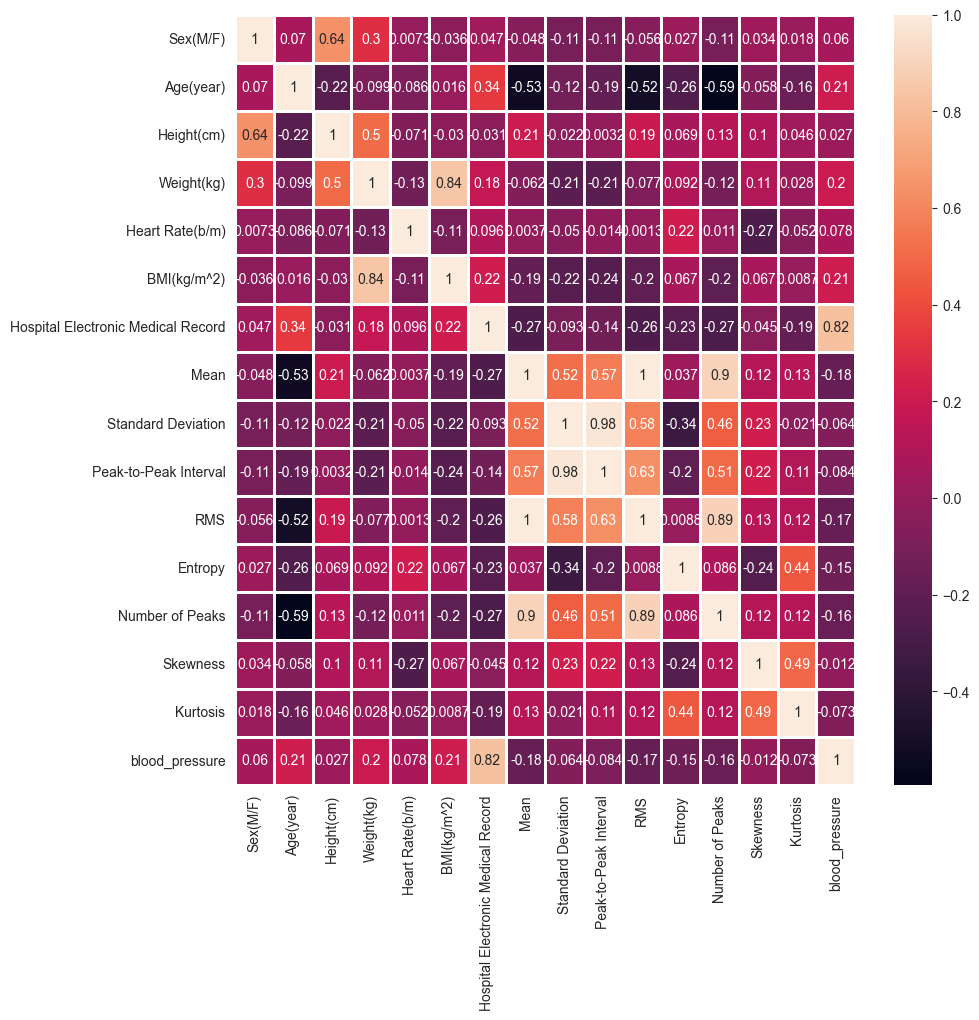

In [96]:
corr_matrix=data.corr()
plt.figure(figsize=(10,10))

sns.heatmap(corr_matrix,  annot=True, linewidth=2)
plt.show()


In [73]:
data

#0 Femal
#1 Male

,Sex(M/F),Age(year),Height(cm),Weight(kg),Heart Rate(b/m),BMI(kg/m^2),Hospital Electronic Medical Record,Mean,Standard Deviation,Peak-to-Peak Interval,RMS,Entropy,Number of Peaks,Skewness,Kurtosis,blood_pressure
0,0,45,152,63,97,27.27,3,2036.919048,252.480802,905.0,2052.507189,2.599049,272.0,0.614909,-0.852316,1
1,0,50,157,50,76,20.28,3,2004.390476,54.930847,229.0,2005.143032,2.544793,275.0,0.542265,-0.989512,1
2,0,47,150,47,79,20.89,0,1981.785714,55.313314,240.0,1982.557485,2.780230,273.0,0.058724,-0.934093,0
3,1,45,172,65,87,21.97,1,2035.307619,64.886690,240.0,2036.341667,2.579943,269.0,0.602817,-0.902085,1
4,0,46,155,65,73,27.06,1,2021.003333,48.010222,199.0,2021.573510,2.740641,279.0,0.177446,-1.019404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1,24,180,70,77,21.60,0,2637.847619,340.154648,1276.0,2659.688938,2.609672,649.0,0.787039,-0.381697,0
215,0,25,156,47,79,19.31,0,2549.885714,619.264065,2261.0,2624.005552,2.582117,666.0,0.604512,-0.852276,0
216,1,25,176,55,72,17.76,1,2770.956190,320.858560,1232.0,2789.470994,2.653982,674.0,0.851054,-0.335141,0
217,1,25,173,63,67,21.05,0,2610.076667,245.508367,901.0,2621.597712,2.551276,668.0,0.752761,-0.630193,0


In [74]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=data.drop("blood_pressure",axis=1)
y=data["blood_pressure"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [75]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", random_state=42, probability=True)
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.9848484848484849

In [76]:
from sklearn.metrics import classification_report,confusion_matrix
svm_prediction=svm.predict(x_test)
print("SVM Classification Report")
print(classification_report(y_test,svm_prediction))

SVM Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.94      1.00      0.97        16

    accuracy                           0.98        66
   macro avg       0.97      0.99      0.98        66
weighted avg       0.99      0.98      0.99        66



In [77]:
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_prediction))

SVM Confusion Matrix:
[[49  1]
 [ 0 16]]


# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predict and evaluate
rf_predictions = rf.predict(x_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
rf.score(x_test, y_test)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.94      1.00      0.97        16

    accuracy                           0.98        66
   macro avg       0.97      0.99      0.98        66
weighted avg       0.99      0.98      0.99        66

Random Forest Confusion Matrix:
[[49  1]
 [ 0 16]]


0.9848484848484849

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=2)
# gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb.fit(x_train, y_train)

# Evaluate the model
print("Gradient Boosting accuracy:", gb.score(x_test, y_test))

Gradient Boosting accuracy: 0.9848484848484849


# Stacking 

In [80]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define the base learners and the meta-learner
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', SVC(random_state=42, probability=True))
]
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)


# Train the stacked model
stacking_classifier.fit(x_train, y_train)

# Evaluate the model
print("Stacking Classifier accuracy:", stacking_classifier.score(x_test, y_test))

Stacking Classifier accuracy: 0.9696969696969697


# Save the model 

In [81]:
import joblib
joblib.dump(rf, 'classification_model.pkl')


['classification_model.pkl']

In [82]:
data.columns

Index(['Sex(M/F)', 'Age(year)', 'Height(cm)', 'Weight(kg)', 'Heart Rate(b/m)',
       'BMI(kg/m^2)', 'Hospital Electronic Medical Record', 'Mean',
       'Standard Deviation', 'Peak-to-Peak Interval', 'RMS', 'Entropy',
       'Number of Peaks', 'Skewness', 'Kurtosis', 'blood_pressure'],
      dtype='object')

In [91]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load('classification_model.pkl')

def get_input_and_predict(model):
    # Create an empty list to hold input values
    features = []

    # List the features required by the model
    feature_names = ['Sex(M/F)', 'Age(year)', 'Height(cm)', 'Weight(kg)', 'Heart Rate(b/m)',
                     'BMI(kg/m^2)', 'Hospital Electronic Medical Record', 'Mean',
                     'Standard Deviation', 'Peak-to-Peak Interval', 'RMS', 'Entropy',
                     'Number of Peaks', 'Skewness', 'Kurtosis']

    # User input prompts with specific instructions for each feature
    for feature in feature_names:
        prompt = f"Enter {feature}: "
        if feature == 'Sex(M/F)':
            prompt += "(1 for Male, 0 for Female) "
        
        value = float(input(prompt))
        features.append(value)
    
    features_array = np.array(features).reshape(1, -1)

    # Predict and print the output using the provided model
    prediction = model.predict(features_array)
    print("Predicted target:", prediction[0])

# Call the function to get input and predict
get_input_and_predict(model)


ValueError: could not convert string to float: ''